In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout

tr_data1 = pd.read_csv("C:/Users/arung/Downloads/Google_Stock_Price_Train.csv")
print("the first 10 rows of the dataset are:")
tr_data1.head(10)



the first 10 rows of the dataset are:


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [30]:
ts_data2 = pd.read_csv("C:/Users/arung/Downloads/Google_Stock_Price_Test.csv")
print("the first 10 rows of the dataset are:")
ts_data2.head(10)


the first 10 rows of the dataset are:


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [31]:
# Normalize and create sequences
tr_prices = tr_data1['Open'].astype(float).values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_prices_scaled = scaler.fit_transform(tr_prices)


def create_sequences(data, sequence_length=30):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 30
X_train, y_train = create_sequences(train_prices_scaled, sequence_length)


In [32]:
# Split the data into training and validation sets
split_indx = int(len(X_train) * 0.8)
X_val = X_train[split_indx:]
y_val = y_train[split_indx:]
X_train = X_train[:split_indx]
y_train = y_train[:split_indx]

In [33]:
# Define the list of model types you want to train
model_types = ['SimpleRNN', 'LSTM', 'GRU']


def build_model(model_type):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
        model.add(LSTM(50, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, 1)))
        model.add(GRU(50, return_sequences=False))
    elif model_type == 'SimpleRNN':
        model.add(SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, 1)))
        model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [34]:
# Dictionary to store results
results = {}

for model_type in model_types:
    model = build_model(model_type)
    print(f"Training {model_type} model...")
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    results[model_type] = {
        'history': history,
        'model': model
    }



Training SimpleRNN model...
Epoch 1/30
31/31 [==============================] - 7s 49ms/step - loss: 0.0796 - val_loss: 0.0022
Epoch 2/30
31/31 [==============================] - 1s 25ms/step - loss: 0.0088 - val_loss: 8.0995e-04
Epoch 3/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 4/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0045 - val_loss: 9.7551e-04
Epoch 5/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0044 - val_loss: 8.1783e-04
Epoch 6/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 7/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 8/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/30
31/31 [==============================] - 1s 27ms/step - l

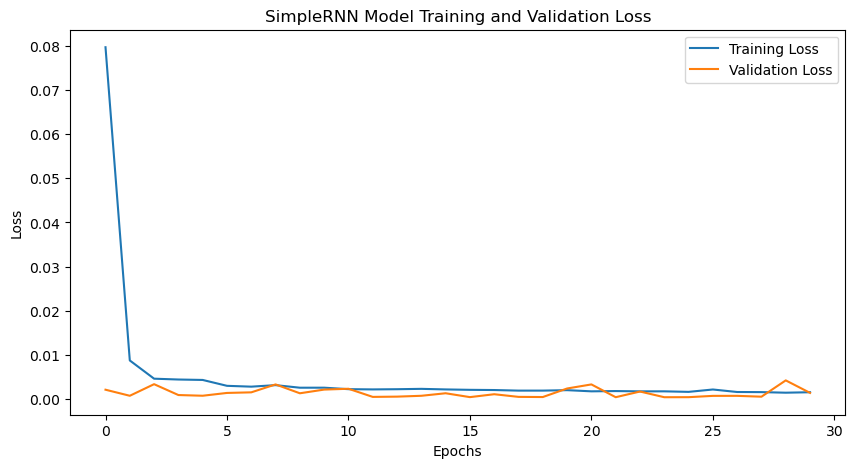

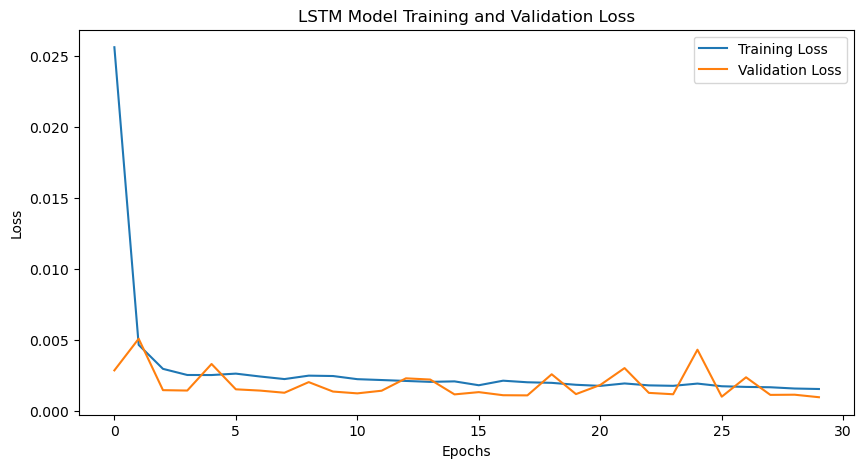

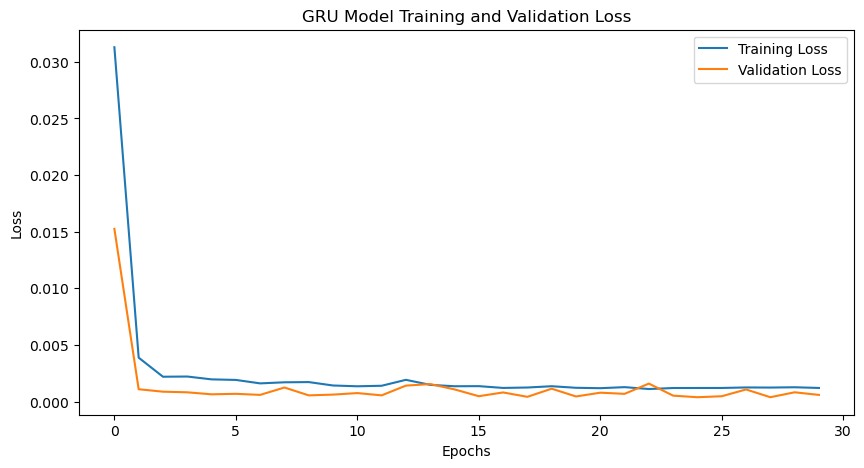

In [35]:
for model_type, result in results.items():
    history = result['history']
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_type} Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

8/8 [==============================] - 0s 18ms/step


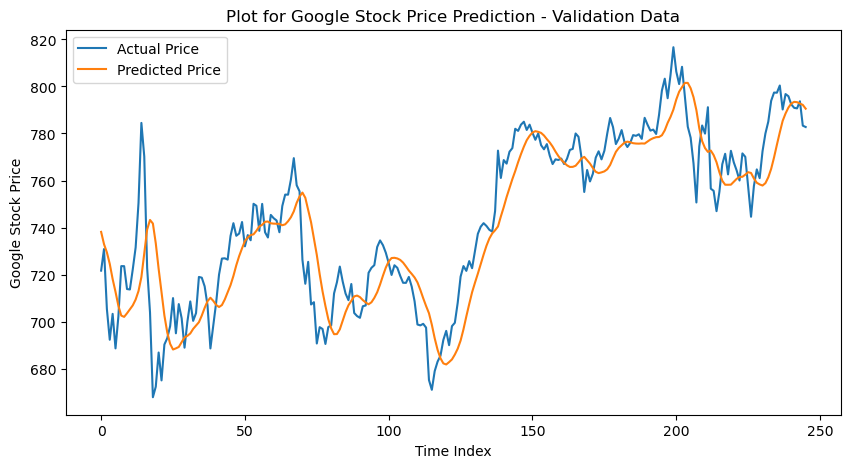

In [37]:
# Choose a model type to use for prediction, e.g., 'LSTM'
model_to_use = results['LSTM']['model']


pred_pri = model_to_use.predict(X_val)
pred_pri = scaler.inverse_transform(pred_pri)  # Undo scaling

real_pri = scaler.inverse_transform(y_val.reshape(-1, 1))

# Plot the predictions alongside actual prices
plt.figure(figsize=(10, 5))
plt.plot(real_pri, label='Actual Price')
plt.plot(pred_pri, label='Predicted Price')
plt.title('Plot for Google Stock Price Prediction - Validation Data')
plt.xlabel('Time Index')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
